## *An√°lisis del Dataset de insuficiencia cardiaca* heart_failure_clinical_records_dataset.csv de Kaggle

### **Presentado por:**

Ang√©lica √ìrtiz √Ålvarez (aortiz016@soyudemedellin.edu.co)

Jhon Jader Diaz Gomez (jdiaz510@soyudemedellin.edu.co)

Cristian Camilo Ospina Metaute (cospina149@soyudemedellin.edu.co)

##### Para iniciar, se importan las librer√≠as requeridas para manipulaci√≥n de datos y manejo de modelos

In [ ]:
import numpy as np 
import pandas as pd
import random
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

##### Posteriormente, se carga el dataset heart_failure_clinical_records_dataset.csv de [Kaggle](https://www.kaggle.com/code/arjunamla02/logistic-regession-vs-decision-tree-vs-rf/notebook) - [UCI Irvine](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)


In [ ]:
# Buscar la carpeta ra√≠z del proyecto por nombre
carpeta_actual = os.getcwd()
nombre_proyecto = "ProyectoCienciaDatos"

# Recorrer hacia arriba hasta encontrar la carpeta ra√≠z
while os.path.basename(carpeta_actual) != nombre_proyecto:
    carpeta_actual = os.path.dirname(carpeta_actual)
    if carpeta_actual == os.path.dirname(carpeta_actual):  # Llegamos al tope
        raise FileNotFoundError(f"No se encontr√≥ la carpeta ra√≠z '{nombre_proyecto}'.")

# Construir la ruta al archivo CSV
ruta_csv = os.path.join(carpeta_actual, "data", "raw", "heart_failure_clinical_records_dataset.csv")

# Leer el archivo
df = pd.read_csv(ruta_csv)
df.head()  


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

##### Se imprime el resumen de la estructura del DataFrame, con el objetivo de inspeccionar los datos.

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## üßæ Descripci√≥n del Dataset

**Nombre del dataset:** `heart-failure-clinical-data`  
**Fuente:** Kaggle  
**Tipo de problema:** Clasificaci√≥n binaria  
**Licencia:** Apache 2.0

### üîç Variables incluidas:
El dataset contiene variables cl√≠nicas relevantes para pacientes con insuficiencia card√≠aca. Algunas de las variables clave incluyen:

- `age`: Edad del paciente
- `anaemia`: Presencia de anemia (booleano)
- `creatinine_phosphokinase`: Nivel de la enzima CPK
- `diabetes`: Diagn√≥stico de diabetes (booleano)
- `ejection_fraction`: Porcentaje de sangre expulsada por el coraz√≥n
- `high_blood_pressure`: Presi√≥n arterial alta (booleano)
- `platelets`: Recuento de plaquetas
- `serum_creatinine`: Nivel de creatinina en sangre
- `serum_sodium`: Nivel de sodio en sangre
- `sex`: Sexo del paciente
- `smoking`: Fumador (booleano)
- `time`: Tiempo de seguimiento en d√≠as
- `DEATH_EVENT`: Variable objetivo (0 = sobrevivi√≥, 1 = falleci√≥)

## üéØ Objetivo del Estudio

El prop√≥sito principal del notebook es comparar el rendimiento de dos modelos de clasificaci√≥n ampliamente utilizados en la industria:

1. **Regresi√≥n Log√≠stica**
3. **Bosque Aleatorio (Random Forest)**

### Objetivos espec√≠ficos:

- Evaluar la capacidad predictiva de cada modelo sobre la variable `DEATH_EVENT`.
- Analizar las ventajas y desventajas de cada enfoque en t√©rminos de:
  - Interpretabilidad
  - Precisi√≥n
  - Curvas ROC y PR
  - Robustez frente al sobreajuste

## üìà Aplicaciones del an√°lisis

Este tipo de estudio es √∫til para:

- Profesionales de la salud que buscan herramientas predictivas para evaluar riesgos cl√≠nicos.
- Cient√≠ficos de datos que desean entender el comportamiento de distintos algoritmos de clasificaci√≥n en contextos m√©dicos.
- Estudiantes y desarrolladores que exploran t√©cnicas de machine learning aplicadas a datos reales.


## üß¨ Estructura del Dataset `heart-failure-clinical-data`

Este dataset contiene informaci√≥n cl√≠nica de pacientes con insuficiencia card√≠aca. La tabla siguiente describe cada columna, su tipo de dato y su significado cl√≠nico:

| Columna                    | Tipo de dato | Descripci√≥n                                                                 |
|----------------------------|--------------|------------------------------------------------------------------------------|
| `age`                      | Num√©rico     | Edad del paciente en a√±os.                                                  |
| `anaemia`                  | Binario      | Disminuci√≥n de gl√≥bulos rojos o hemoglobina (1 = s√≠, 0 = no).               |
| `creatinine_phosphokinase`| Num√©rico     | Nivel de la enzima CPK en sangre (mcg/L).                                   |
| `diabetes`                 | Binario      | Indica si el paciente tiene diabetes (1 = s√≠, 0 = no).                      |
| `ejection_fraction`        | Num√©rico     | Porcentaje de sangre expulsada por el coraz√≥n en cada contracci√≥n.         |
| `high_blood_pressure`      | Binario      | Indica si el paciente tiene hipertensi√≥n (1 = s√≠, 0 = no).                  |
| `platelets`                | Num√©rico     | N√∫mero de plaquetas en sangre (kiloplaquetas/mL).                           |
| `serum_creatinine`         | Num√©rico     | Nivel de creatinina en sangre (mg/dL).                                      |
| `serum_sodium`             | Num√©rico     | Nivel de sodio en sangre (mEq/L).                                           |
| `sex`                      | Binario      | Sexo del paciente (1 = masculino, 0 = femenino).                            |
| `smoking`                  | Binario      | Indica si el paciente fuma (1 = s√≠, 0 = no).                                |
| `time`                     | Num√©rico     | Tiempo de seguimiento del paciente (en d√≠as).                               |
| `DEATH_EVENT`              | Binario      | Variable objetivo: indica si el paciente falleci√≥ durante el seguimiento.  |


##### Debido a que la base de datos original tiene solo 299 registros, se simula 2700 adicionales para completar 3000, de manera que tengamos una base de datos con suficientes datos y con ruido para hacer el ejercicio de manipulaci√≥n de datos.

In [336]:
# Definici√≥n de las columnas y sus tipos de datos esperados
# Basado en la estructura del dataset "heart_failure_clinical_records_dataset"
columns = [
    'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
    'DEATH_EVENT'
]

# Rango de valores (aproximados, basados en el dataset original) para la generaci√≥n sint√©tica
data_ranges = {
    'age': (40, 95),
    'anaemia': (0, 1), # Binario
    'creatinine_phosphokinase': (23, 7861), # Valor alto para simular la dispersi√≥n
    'diabetes': (0, 1), # Binario
    'ejection_fraction': (14, 80),
    'high_blood_pressure': (0, 1), # Binario
    'platelets': (100000, 850000), # Rango amplio
    'serum_creatinine': (0.5, 9.4),
    'serum_sodium': (113, 148),
    'sex': (0, 1), # Binario (Mujer=0, Hombre=1 o viceversa, solo necesitamos el binario)
    'smoking': (0, 1), # Binario
    'time': (4, 285),
    'DEATH_EVENT': (0, 1) # Binario (Target)
}

# --- 1. Simulaci√≥n de los 299 Registros Originales (Base) ---
# Creamos un DataFrame base de 299 filas con datos limpios y aleatorios dentro del rango,
# para simular la parte original del dataset.

np.random.seed(42) # Para reproducibilidad

base_records = 299
data_base = {}

# Generar datos limpios para la base
for col in columns:
    min_val, max_val = data_ranges[col]

    if col in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'time']:
        data_base[col] = np.random.randint(min_val, max_val + 1, base_records)
    elif col in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']:
        data_base[col] = np.random.randint(min_val, max_val + 1, base_records)
    elif col in ['platelets']:
        # Simular n√∫meros grandes, a veces con decimales como en el dataset original
        data_base[col] = np.round(np.random.uniform(min_val, max_val, base_records), 2)
    elif col in ['serum_creatinine', 'serum_sodium']:
        data_base[col] = np.round(np.random.uniform(min_val, max_val, base_records), 2)

df_base = pd.DataFrame(data_base)

# Asegurar que las columnas binarias y enteras sean de tipo entero en la base
int_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
            'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking',
            'time', 'DEATH_EVENT']
for col in int_cols:
    df_base[col] = df_base[col].astype(int)


# --- 2. y 3. Generaci√≥n de 2701 Registros Sint√©ticos con Errores ---

new_records = 3000 - base_records
data_new = {}

# Generar datos base para los nuevos registros
for col in columns:
    min_val, max_val = data_ranges[col]

    if col in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'time']:
        data_new[col] = np.random.randint(min_val, max_val + 1, new_records)
    elif col in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']:
        data_new[col] = np.random.randint(min_val, max_val + 1, new_records)
    elif col in ['platelets']:
        data_new[col] = np.round(np.random.uniform(min_val, max_val, new_records), 2)
    elif col in ['serum_creatinine', 'serum_sodium']:
        data_new[col] = np.round(np.random.uniform(min_val, max_val, new_records), 2)

df_new = pd.DataFrame(data_new)


### INTRODUCCI√ìN DE AJUSTES Y ERRORES (Nulos y Tipos de Datos) ###

# 1. VALORES NULOS (NaN)
# Se introduce NaN en aproximadamente el 5% al 15% de los nuevos registros para algunas columnas
np.random.seed(43) # Nueva semilla para la introducci√≥n de errores

# Columnas seleccionadas para nulos (mezclando tipos)
null_cols = ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'DEATH_EVENT']

for col in null_cols:
    nan_count = int(new_records * random.uniform(0.05, 0.15))
    nan_indices = np.random.choice(df_new.index, nan_count, replace=False)
    df_new.loc[nan_indices, col] = np.nan

# 2. CAMBIOS EN EL TIPO DE DATO (para forzar conversi√≥n o limpieza)

# a) Conversi√≥n de Binarias/Enteras a Texto (String) o Nombres
# La columna 'sex' (0 o 1) se convierte a 'MALE'/'FEMALE' en algunos registros para requerir mapeo
string_conversion_count = int(new_records * 0.10)
string_indices = np.random.choice(df_new.index, string_conversion_count, replace=False)

for i in string_indices:
    # Si es 1, convi√©rtelo a 'Male', si es 0, convi√©rtelo a 'Female'.
    # Usamos una mezcla de 'Male'/'male' para simular inconsistencias
    if df_new.loc[i, 'sex'] == 1:
        df_new.loc[i, 'sex'] = random.choice(['MALE', 'male'])
    else:
        df_new.loc[i, 'sex'] = random.choice(['FEMALE', 'female'])

# b) Conversi√≥n de Decimales a Texto con caracteres no num√©ricos
# La columna 'serum_creatinine' se convierte a string con un s√≠mbolo/unidad en algunos casos
string_unit_count = int(new_records * 0.08)
string_unit_indices = np.random.choice(df_new.index, string_unit_count, replace=False)

for i in string_unit_indices:
    original_value = df_new.loc[i, 'serum_creatinine']
    if not pd.isna(original_value): # No modificar si ya es NaN
        df_new.loc[i, 'serum_creatinine'] = f"{original_value:.2f} mg/dL"
    else:
        df_new.loc[i, 'serum_creatinine'] = 'Desconocido' # Otro valor no num√©rico

# c) Valores inconsistentes para booleanas/binarias
# La columna 'diabetes' (0 o 1) se convierte a 'YES'/'NO'/'N/A'/'2' en algunos registros
inconsistent_count = int(new_records * 0.12)
inconsistent_indices = np.random.choice(df_new.index, inconsistent_count, replace=False)

for i in inconsistent_indices:
    if df_new.loc[i, 'diabetes'] == 1:
        df_new.loc[i, 'diabetes'] = random.choice(['YES', 2]) # Mezcla de string y otro entero
    else:
        df_new.loc[i, 'diabetes'] = random.choice(['NO', 'N/A', 0]) # Mezcla de string y valor correcto

# d) Valores extremos no v√°lidos o placeholders
# En 'ejection_fraction' (deber√≠a ser 14-80%), se introducen valores como -1 o 999
extreme_count = int(new_records * 0.04)
extreme_indices = np.random.choice(df_new.index, extreme_count, replace=False)
for i in extreme_indices:
    df_new.loc[i, 'ejection_fraction'] = random.choice([-1, 999])

# --- 4. Combinar y Guardar ---

# Concatenar la base (limpia) y los nuevos registros (con errores)
df_final = pd.concat([df_base, df_new], ignore_index=True)

# Reordenar las columnas para asegurar el formato original
df_final = df_final[columns]

# Guardar el DataFrame final en un archivo CSV
output_filename = 'heart_failure_clinical_records_extended.csv'
df_final.to_csv(output_filename, index=False)

print(f"Base de datos generada: {output_filename}")
print(f"Total de registros: {len(df_final)}")
print(f"Registros originales (simulados): {len(df_base)}")
print(f"Registros nuevos (con errores): {len(df_new)}")

# Muestra de las primeras filas con los errores introducidos
print("\nPrimeras filas del CSV final:")
print(df_final.head(30))
print("\n√öltimas filas del CSV final (donde se concentran los errores):")
print(df_final.tail(30))

df = df_final.copy()

Base de datos generada: heart_failure_clinical_records_extended.csv
Total de registros: 3000
Registros originales (simulados): 299
Registros nuevos (con errores): 2701

Primeras filas del CSV final:
     age  anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0   78.0        0                    1702.0        0                 51   
1   91.0        0                    3529.0        0                 28   
2   68.0        1                    5115.0        1                 77   
3   54.0        0                    7276.0        1                 41   
4   82.0        0                    2767.0        1                 52   
5   47.0        1                    3379.0        1                 70   
6   60.0        1                    4068.0        1                 30   
7   78.0        0                    1266.0        1                 57   
8   58.0        0                    5211.0        1                 38   
9   62.0        1                    3141.0        

C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\492679449.py:106: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'male' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_new.loc[i, 'sex'] = random.choice(['MALE', 'male'])
C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\492679449.py:118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.24 mg/dL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_new.loc[i, 'serum_creatinine'] = f"{original_value:.2f} mg/dL"
C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\492679449.py:129: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int32, please explicitly cast to a compatible dtype first

## üîé Exploraci√≥n R√°pida de Datos (EDA)

Este bloque de c√≥digo realiza un an√°lisis exploratorio inicial sobre un DataFrame `df`, con el objetivo de comprender su estructura, calidad de datos y detectar la variable objetivo para tareas de clasificaci√≥n o regresi√≥n.

### üß© 1. Informaci√≥n general del dataset
- **`df.shape`**: Muestra el n√∫mero de filas y columnas del dataset.
- **`df.columns.tolist()`**: Lista los nombres de las columnas presentes.
- **`df.info()`**: Proporciona informaci√≥n sobre el tipo de datos de cada columna, cantidad de valores no nulos y uso de memoria.

### üìä 2. Estad√≠sticas descriptivas

- Se genera un resumen estad√≠stico de las columnas num√©ricas: media, desviaci√≥n est√°ndar, valores m√≠nimos, m√°ximos y percentiles.
- La transposici√≥n (`.T`) permite visualizar las estad√≠sticas en formato vertical, facilitando la lectura.

### üßº 3. Detecci√≥n de valores nulos

- Se calcula el n√∫mero de valores nulos por columna para evaluar la calidad del dataset y decidir si es necesario imputar o eliminar datos.

### üéØ 4. Identificaci√≥n de la variable objetivo

- Se busca autom√°ticamente una columna llamada `target` o `label`, que com√∫nmente representa la variable objetivo.
- Si no se encuentra, se asume que la √∫ltima columna podr√≠a ser la etiqueta.

### üìà 5. Distribuci√≥n de la variable objetivo

- Se muestra la distribuci√≥n de clases en la variable objetivo, √∫til para detectar desbalance de clases.
- Si no se detecta una columna expl√≠cita como `target` o `label`, se analiza la √∫ltima columna como posible candidata.

In [337]:
print("Shape:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nInfo:")
display(df.info())

print("\nDescripci√≥n num√©rica:")
display(df.describe().T)

Shape: (3000, 13)

Columnas: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2840 non-null   float64
 1   anaemia                   3000 non-null   int64  
 2   creatinine_phosphokinase  2786 non-null   float64
 3   diabetes                  3000 non-null   object 
 4   ejection_fraction         3000 non-null   int64  
 5   high_blood_pressure       3000 non-null   int64  
 6   platelets                 2686 non-null   float64
 7   serum_creatinine          2845 non-null   object 
 8   serum_sodium              3000 non-null   float64
 9   sex                       3000 non-null   object 
 10 

None


Descripci√≥n num√©rica:


count           mean            std        min  \
age                       2840.0      67.661620      16.216654      40.00   
anaemia                   3000.0       0.505000       0.500058       0.00   
creatinine_phosphokinase  2786.0    3861.659727    2242.393516      25.00   
ejection_fraction         3000.0      60.247333     117.576921      -1.00   
high_blood_pressure       3000.0       0.493333       0.500039       0.00   
platelets                 2686.0  474664.174926  218736.291022  100902.71   
serum_sodium              3000.0     130.770633      10.069369     113.02   
smoking                   3000.0       0.480333       0.499696       0.00   
time                      3000.0     141.505667      81.531060       4.00   
DEATH_EVENT               2796.0       0.489628       0.499982       0.00   

                                  25%         50%          75%        max  
age                           54.0000      67.000      82.0000      95.00  
anaemia                        0.0000       1.000       1.0000       1.00  
creatinine_phosphokinase    1856.2500    3793.500    5754.7500    7856.00  
ejection_fraction             30.0000      47.000      64.0000     999.00  
high_blood_pressure            0.0000       0.000       1.0000       1.00  
platelets                 278418.3325  470766.435  670618.8675  849853.86  
serum_sodium                 122.2475     130.735     139.4225     148.00  
smoking                        0.0000       0.000       1.0000       1.00  
time                          71.7500     137.000     214.0000     285.00  
DEATH_EVENT                    0.0000       0.000       1.0000       1.00

In [338]:
# Tipos, nulos, valores √∫nicos
print("Tipos de datos:")
display(df.dtypes)
print("\nValores nulos por columna:")
display(df.isnull().sum())
print("\nConteos √∫nicos por columna (hasta 10 mostrados):")
display(df.nunique().sort_values(ascending=False).head(20))

# Asegurar que la columna target est√° presente y es entera
target_col = "DEATH_EVENT"
if target_col not in df.columns:
    raise KeyError(f"No se encontr√≥ la columna objetivo '{target_col}' en el dataset.")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce").astype("Int64")
print(f"\nDistribuci√≥n de {target_col}:")
display(df[target_col].value_counts(dropna=False))

# Corregir posibles columnas num√©ricas mal tipadas (por ejemplo ages con float)
for c in df.columns:
    if df[c].dtype == "float64" and df[c].dropna().apply(float.is_integer).all():
        # si son floats que representan enteros, convertir a int
        df[c] = df[c].astype("Int64")

Tipos de datos:


age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                     object
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine             object
serum_sodium                float64
sex                          object
smoking                       int64
time                          int64
DEATH_EVENT                 float64
dtype: object


Valores nulos por columna:


age                         160
anaemia                       0
creatinine_phosphokinase    214
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   314
serum_creatinine            155
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                 204
dtype: int64


Conteos √∫nicos por columna (hasta 10 mostrados):


platelets                   2686
creatinine_phosphokinase    2323
serum_sodium                1993
serum_creatinine            1030
time                         282
ejection_fraction             69
age                           56
sex                            6
diabetes                       6
anaemia                        2
high_blood_pressure            2
smoking                        2
DEATH_EVENT                    2
dtype: int64


Distribuci√≥n de DEATH_EVENT:


DEATH_EVENT
0       1427
1       1369
<NA>     204
Name: count, dtype: Int64

##### Despu√©s de hacer la exploraci√≥n inicial, identificamos lo siguiente:
- Hay 13 columnas y 3000 registros. 
- Las columnas `age`, ``creatinine``, ``platelets``, ``serum_cretinine`` y ``Death_event`` tienen nulos y los tipos de datos son n√∫mericos y objetos
- De las 13 columnas existentes, hay 6 columnas booleanas que indican si se da o no esa situaci√≥n: ``diabetes``, ``anaemia``, ``high_blood_pressure``, ``sex``, ``smoking``, ``DEATH_EVENT``

##### Preprocesamiento inicial de datos
Se eliminan los registros nulos de la variable objetivo ``Death_event`` debido a que consideramos que es un valor relevante para la predicci√≥n

In [339]:
df.dropna(subset=['DEATH_EVENT'], inplace=True)
print("\nValores nulos por columna:")
display(df.isnull().sum())


Valores nulos por columna:


age                         144
anaemia                       0
creatinine_phosphokinase    198
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   295
serum_creatinine            147
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

In [340]:
# Reemplaza la celda incompleta por el siguiente c√≥digo:
for col in df.columns:
    print(f"\n=== Columna: {col} ===")
    # Tipos por elemento
    tipos = df[col].apply(type).value_counts()
    print("Tipos por elemento:")
    print(tipos.to_dict())



=== Columna: age ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: anaemia ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: creatinine_phosphokinase ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: diabetes ===
Tipos por elemento:
{<class 'int'>: 2632, <class 'str'>: 164}

=== Columna: ejection_fraction ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: high_blood_pressure ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: platelets ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: serum_creatinine ===
Tipos por elemento:
{<class 'float'>: 2597, <class 'str'>: 199}

=== Columna: serum_sodium ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: sex ===
Tipos por elemento:
{<class 'int'>: 2552, <class 'str'>: 244}

=== Columna: smoking ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: time ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: DEATH_EVENT ===
Tipos por elemento:
{<class 'int'>: 279

De la revisi√≥n anterior, se identifica que las columnas `serum_creatinine`, `sex` y `diabetes`
tienen valores que son de tipo *string*, cuando se espera que sean todos num√©ricos.
Se realiza un procesamiento especial para estas columnas.

##### Transformaci√≥n y limpieza de la columna `serum_creatine`

Este proceso tiene como objetivo estandarizar los datos de la columna `serum_creatine` a un tipo booleano, identificando y transformando los valores de texto y gestionando los valores nulos.

In [ ]:
strings_serum_creatinine = df['serum_creatinine'][df['serum_creatinine'].apply(lambda x: isinstance(x, str))]
strings_serum_creatinine

301      6.44 mg/dL
327      8.22 mg/dL
360      4.46 mg/dL
370     Desconocido
372      4.40 mg/dL
           ...     
2956     1.43 mg/dL
2978     1.63 mg/dL
2979     5.00 mg/dL
2984     6.83 mg/dL
2998     9.13 mg/dL
Name: serum_creatinine, Length: 199, dtype: object

In [ ]:
def clean_serum_creatinine(v):
    if pd.isna(v):
        return np.nan
    if isinstance(v, str):
        s = v.strip()
        if s.lower() == 'desconocido':
            return np.nan
        s = s.replace(',', '.')
        m = re.search(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', s)
        return float(m.group()) if m else np.nan
    try:
        return float(v)
    except Exception:
        return np.nan

df['serum_creatinine'] = df['serum_creatinine'].apply(clean_serum_creatinine)
df['serum_creatinine'] = pd.to_numeric(df['serum_creatinine'], errors='coerce')

print("\nResumen post-limpieza serum_creatinine:")
print(df['serum_creatinine'].describe())
print("Nulos en serum_creatinine:", df['serum_creatinine'].isna().sum())


Resumen post-limpieza serum_creatinine:
count    2637.000000
mean        5.004494
std         2.542980
min         0.500000
25%         2.820000
50%         5.080000
75%         7.140000
max         9.400000
Name: serum_creatinine, dtype: float64
Nulos en serum_creatinine: 159


##### Transformaci√≥n y limpieza de la columna `sex`

Este proceso tiene como objetivo estandarizar los datos de la columna `sex` a un tipo booleano, identificando y transformando los valores de texto y gestionando los valores nulos (NaN).

In [ ]:
strings_sex = df['sex'][df['sex'].apply(lambda x: isinstance(x, str))]
strings_sex

300     FEMALE
336       MALE
339       MALE
349       male
351       male
         ...  
2946    female
2949    FEMALE
2969    female
2973    FEMALE
2994    FEMALE
Name: sex, Length: 244, dtype: object

In [344]:
df['sex'].unique()

array([1, 0, 'FEMALE', 'MALE', 'male', 'female'], dtype=object)

In [ ]:
def clean_sex(v):
    if isinstance(v, str):
        s = v.lower()
        if s in ('male'):
            return 1
        if s in ('female'):
            return 0
    else:
        return v

df['sex'] = df['sex'].apply(clean_sex)

print("\nConteos en 'sex' despu√©s de la limpieza (incluye NA):")
display(df['sex'].value_counts(dropna=False))



Conteos en 'sex' despu√©s de la limpieza (incluye NA):


sex
1    1422
0    1374
Name: count, dtype: int64

##### Transformaci√≥n y limpieza de la columna `diabetes`

Este proceso tiene como objetivo estandarizar los datos de la columna `diabetes` a un tipo booleano, identificando y transformando los valores de texto y gestionando los valores nulos (NaN).

In [346]:
df['diabetes'].unique()

array([0, 1, 'YES', 'NO', 2, 'N/A'], dtype=object)

In [ ]:
strings_diabetes = df['diabetes'][df['diabetes'].apply(lambda x: isinstance(x, str))]
strings_diabetes

301     YES
313      NO
317     YES
331     YES
361     YES
       ... 
2916    N/A
2926    YES
2948    N/A
2962    YES
2998     NO
Name: diabetes, Length: 164, dtype: object

In [ ]:
def clean_diabetes(v):
    if isinstance(v, str):
        s = v.lower()
        if s in ('yes'):
            return 1
        if s in ('no'):
            return 0
        if s in ('n/a'):
            return np.nan
    elif v == 2:
        return np.nan
    else:
        return v

df['diabetes'] = df['diabetes'].apply(clean_diabetes).astype('Int64')


print("\nConteos en 'diabetes' despu√©s de la limpieza (incluye NA):")
display(df['diabetes'].value_counts(dropna=False))


Conteos en 'diabetes' despu√©s de la limpieza (incluye NA):


diabetes
0       1406
1       1261
<NA>     129
Name: count, dtype: Int64

In [349]:
# Reemplaza la celda incompleta por el siguiente c√≥digo:
for col in df.columns:
    print(f"\n=== Columna: {col} ===")
    # Tipos por elemento
    tipos = df[col].apply(type).value_counts()
    print("Tipos por elemento:")
    print(tipos.to_dict())



=== Columna: age ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: anaemia ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: creatinine_phosphokinase ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: diabetes ===


Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: ejection_fraction ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: high_blood_pressure ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: platelets ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: serum_creatinine ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: serum_sodium ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: sex ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: smoking ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: time ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: DEATH_EVENT ===
Tipos por elemento:
{<class 'int'>: 2796}


### Se valida que no hay valores tipo  string en las columnas num√©ricas

## Imputaci√≥n y manejo de nulos

Debido al ruido que puede generar la imputaci√≥n de las variables booleanas, se elimina los registros nulos de ellas

Por otro lado, para las variables flotantes, procedemos a hacer imputaci√≥n seg√∫n el tipo

In [350]:
# Se identifica que de las 13 columnas existentes, hay 6 columnas booleanas que indican si se da o no esa situaci√≥n.
cols_to_bool = [
    "diabetes",
    "anaemia",
    "high_blood_pressure",
    "sex",
    "smoking",
    "DEATH_EVENT"
]

for c in cols_to_bool:
    df[c] = pd.to_numeric(df[c], errors="coerce").map({0: False, 1: True}).astype("boolean")


In [351]:
display(df.isnull().sum())

age                         144
anaemia                       0
creatinine_phosphokinase    198
diabetes                    129
ejection_fraction             0
high_blood_pressure           0
platelets                   295
serum_creatinine            159
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

In [352]:
df.dropna(subset= ['diabetes'], inplace=True)
print("\nValores nulos por columna:")
display(df.isnull().sum())


Valores nulos por columna:


age                         136
anaemia                       0
creatinine_phosphokinase    186
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   284
serum_creatinine            151
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2531 non-null   Int64  
 1   anaemia                   2667 non-null   boolean
 2   creatinine_phosphokinase  2481 non-null   Int64  
 3   diabetes                  2667 non-null   boolean
 4   ejection_fraction         2667 non-null   int64  
 5   high_blood_pressure       2667 non-null   boolean
 6   platelets                 2383 non-null   float64
 7   serum_creatinine          2516 non-null   float64
 8   serum_sodium              2667 non-null   float64
 9   sex                       2667 non-null   boolean
 10  smoking                   2667 non-null   boolean
 11  time                      2667 non-null   int64  
 12  DEATH_EVENT               2667 non-null   boolean
dtypes: Int64(2), boolean(6), float64(3), int64(2)
memory usage: 203.2 KB

### Con el fin de identificar la distribuci√≥n de los datos, se realiza la siguiente gr√°fica

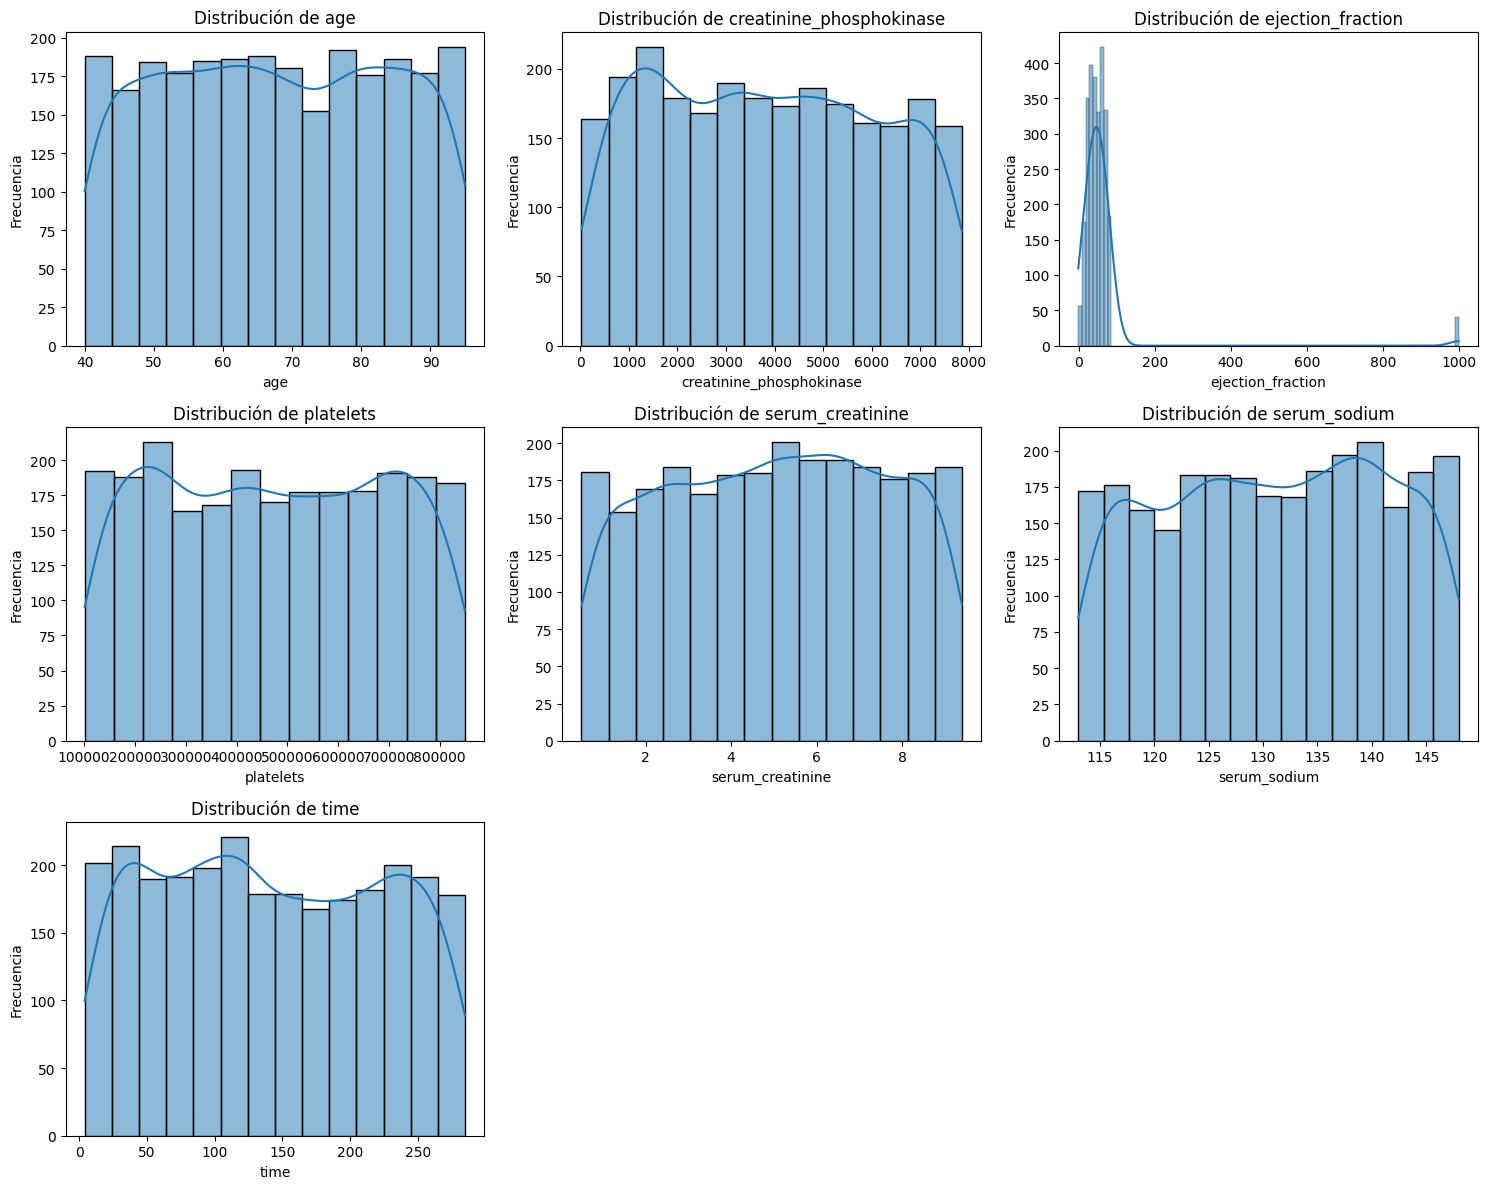

In [354]:
# Obtener columnas num√©ricas (excluyendo booleanas)
numeric_cols = df.select_dtypes(exclude=['boolean']).columns

# Calcular n√∫mero de filas y columnas para el subplot
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Crear figura
plt.figure(figsize=(15, 4*n_rows))

# Crear subplots para cada variable
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Se observan datos atipicos en ejection fraction 

In [355]:
# Se elimina los valores at√≠picos en ejection_fraction
df['ejection_fraction'] = df['ejection_fraction'].apply(lambda x: np.nan if x < 0 or x > 200 else x)

## Se procede a guardar el dataframe procesado


In [356]:
df.to_csv('heart_failure_clinical_records_extended_cleaned.csv', index=False)

### Se realizan m√∫ltiples gr√°ficas para entender los datos

In [357]:
bins = [39, 45, 50, 55, 60, 65, 70, 75, 80, 95]
labels = ["40-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-95"]

d2_ = df.copy()

d2_['age_group'] = pd.cut(d2_['age'], bins=bins, labels=labels, right=True)

d2_[['age', 'age_group']].head()

age age_group
0   78     76-80
1   91     81-95
2   68     66-70
3   54     51-55
4   82     81-95

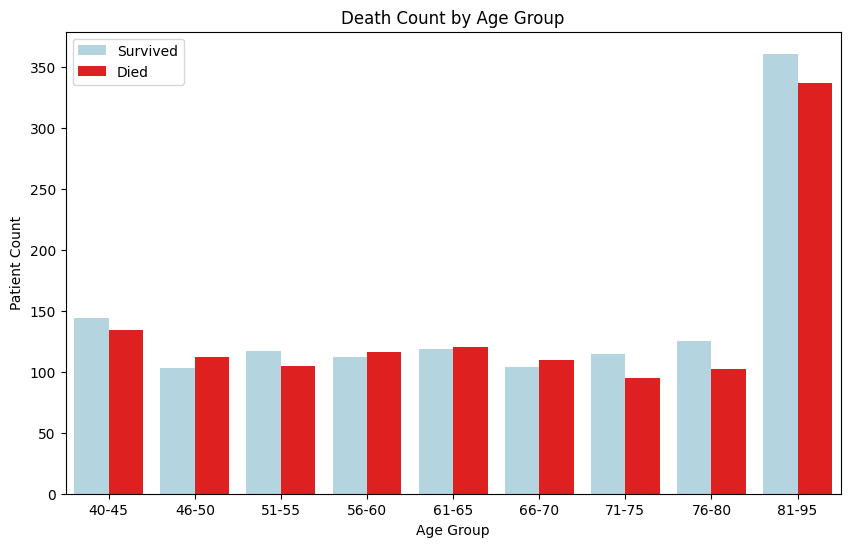

In [358]:
plt.figure(figsize=(10,6))
sns.countplot(data=d2_, x='age_group', hue='DEATH_EVENT', palette=["lightblue", "red"])
plt.title("Death Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Patient Count")
plt.legend(["Survived", "Died"])
plt.show()

La gr√°fica muestra que, aunque los grupos de edad intermedios (ej. 51‚Äì65) concentran el mayor n√∫mero absoluto de pacientes sobrevivientes, la proporci√≥n de fallecidos aumenta claramente en los grupos de mayor edad; especialmente 71‚Äì75 y 81‚Äì95 presentan tasas de mortalidad notablemente m√°s altas que los grupos j√≥venes; esto sugiere una relaci√≥n positiva entre edad y riesgo de muerte durante el seguimiento.

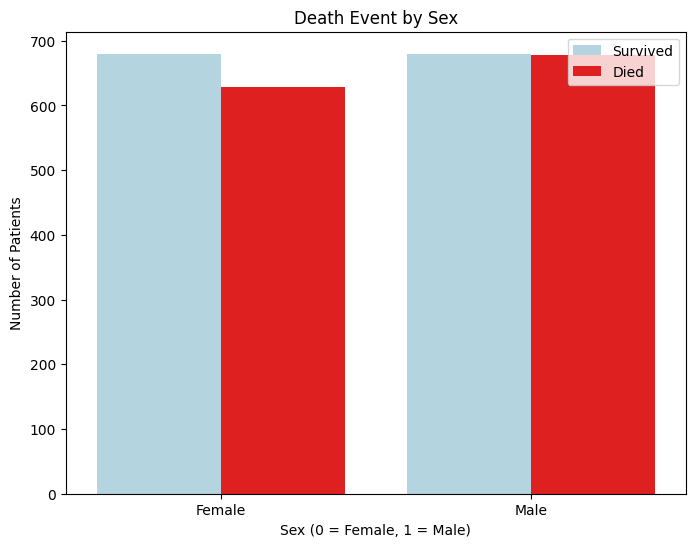

In [359]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex', hue='DEATH_EVENT', palette=["lightblue", "red"])

plt.title("Death Event by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Number of Patients")
plt.legend(["Survived", "Died"])
plt.xticks([0, 1], ["Female", "Male"])
plt.show()

En la gr√°fica por sexo se observa que hay m√°s pacientes hombres que mujeres y, en valores absolutos, tambi√©n m√°s muertes entre los hombres; no obstante, al mirar la proporci√≥n de fallecidos dentro de cada grupo la diferencia parece menos contundente y podr√≠a ser peque√±a o nula ‚Äîes decir, el mayor n√∫mero de muertes en hombres puede deberse en parte al mayor tama√±o de esa submuestra. 

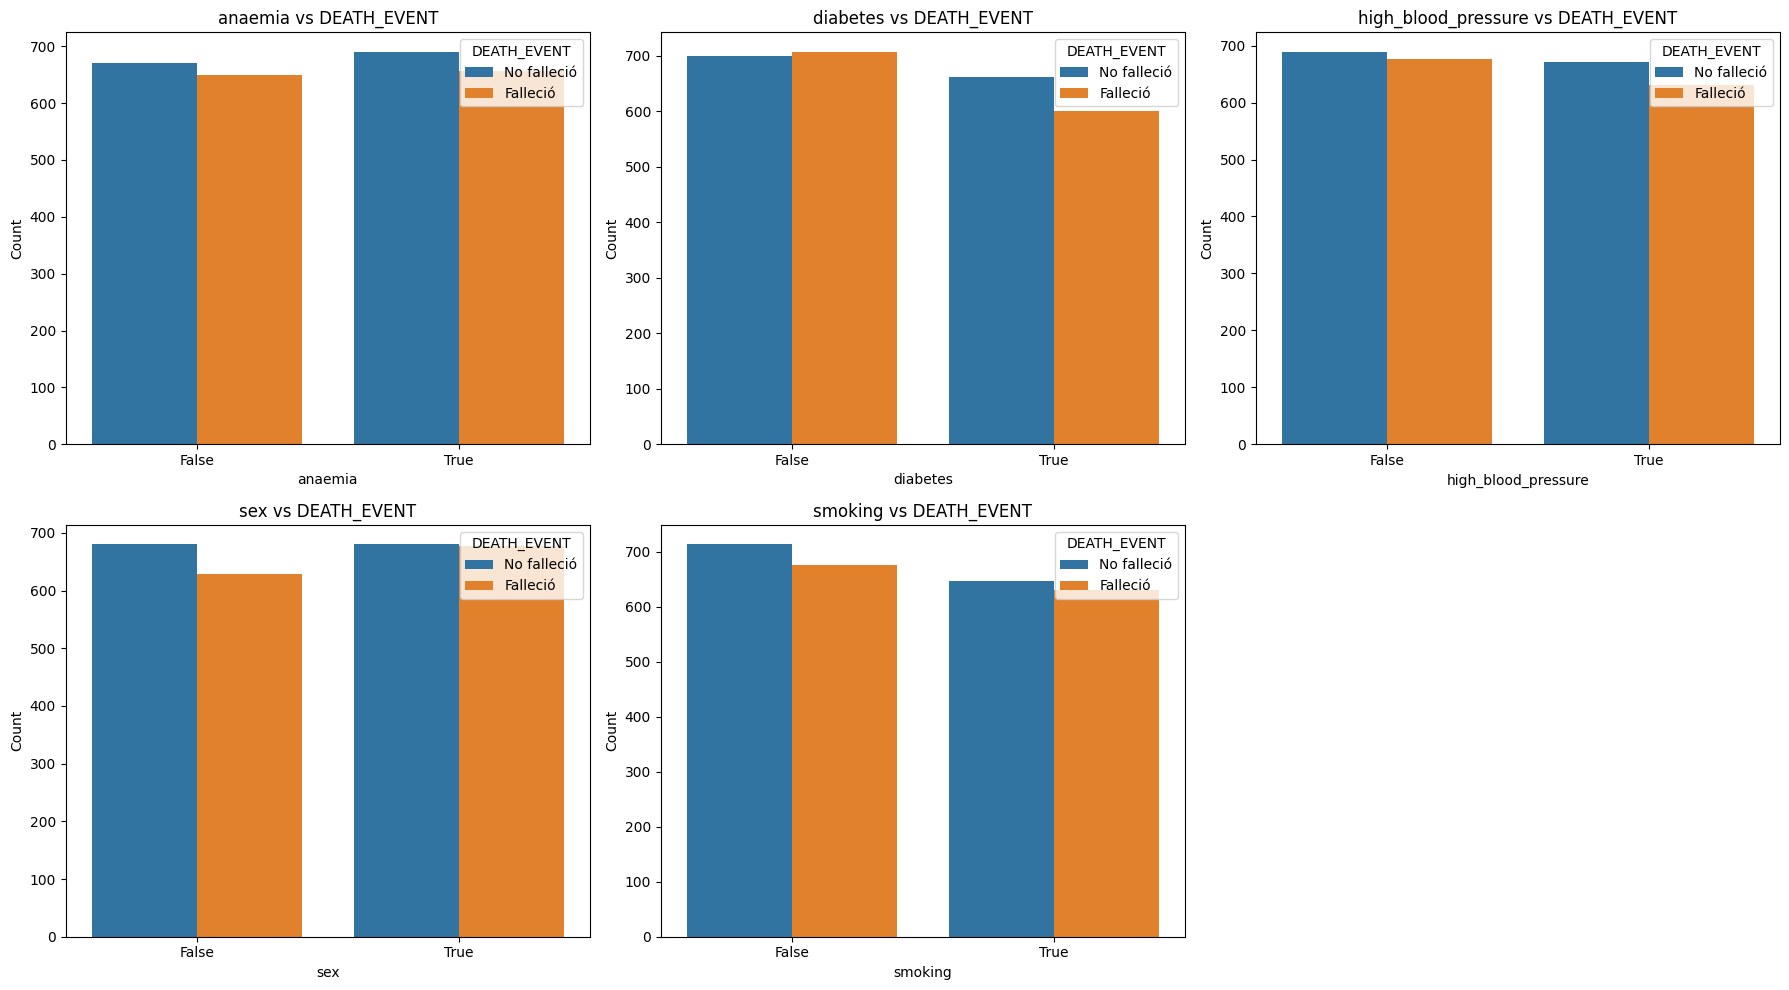

In [360]:
# Variables binarias que quieres comparar
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Graficar cada variable
for i, var in enumerate(binary_vars):
    sns.countplot(data=df, x=var, hue='DEATH_EVENT', ax=axes[i])
    axes[i].set_title(f'{var} vs DEATH_EVENT')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='DEATH_EVENT', labels=['No falleci√≥', 'Falleci√≥'])

# Eliminar subplot vac√≠o si hay uno
if len(binary_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Anaemia
Observaci√≥n visual: la barra roja (fallecidos) relativa al total del grupo parece m√°s alta en pacientes con anaemia (True) que en los que no tienen anaemia (False).
Interpretaci√≥n: sugiere que la presencia de anemia est√° asociada a una mayor proporci√≥n de fallecimientos en el seguimiento. Cl√≠nicamente plausible: la anemia puede reflejar peor estado general o comorbilidades.
Se√±al: moderada-fuerte visualmente (la diferencia de proporci√≥n es notable).

Diabetes
Observaci√≥n visual: tambi√©n aqu√≠ la proporci√≥n de muertes parece mayor entre los diab√©ticos (True) que entre los no diab√©ticos.
Interpretaci√≥n: indica una asociaci√≥n positiva entre diabetes y mortalidad. Podr√≠a reflejar mayor carga de comorbilidad o peor pron√≥stico.
Se√±al: moderada; la diferencia es apreciable pero no tan grande como en algunos otros factores (seg√∫n la gr√°fica).

High_blood_pressure (hipertensi√≥n)
Observaci√≥n visual: se ve un mayor n√∫mero absoluto de muertes en quienes tienen hipertensi√≥n (True) comparado con No, y la proporci√≥n de muertes dentro de ¬´True¬ª parece superior.
Interpretaci√≥n: hipertensi√≥n podr√≠a asociarse a mayor riesgo, aunque en muchos estudios su efecto depende de control, edad y otros factores cardiovasculares.
Se√±al: moderada; comparable a diabetes/anaemia.

Sex (sexo)
Observaci√≥n visual: hay muchos m√°s hombres que mujeres en la muestra; en valores absolutos hay m√°s muertes entre hombres (barra roja masculina mayor).
Interpretaci√≥n: el mayor n√∫mero de muertes en hombres podr√≠a deberse a (a) mayor tama√±o de la submuestra masculina o (b) un riesgo real mayor en hombres. Visualmente, la proporci√≥n no parece tan distinta como los conteos absolutos; por tanto la diferencia puede ser en gran parte por el mayor n√∫mero de hombres.
Se√±al: d√©bil-moderada; necesita comparar proporciones (tasa de muerte por sexo) antes de concluir un efecto fuerte.

Smoking (tabaquismo)
Observaci√≥n visual: los fumadores (True) muestran una proporci√≥n de fallecidos claramente mayor que los no fumadores.
Interpretaci√≥n: tabaquismo asociado a mayor mortalidad, coherente con efectos sobre enfermedad cardiovascular y comorbilidades.
Se√±al: moderada-fuerte.

<Axes: >

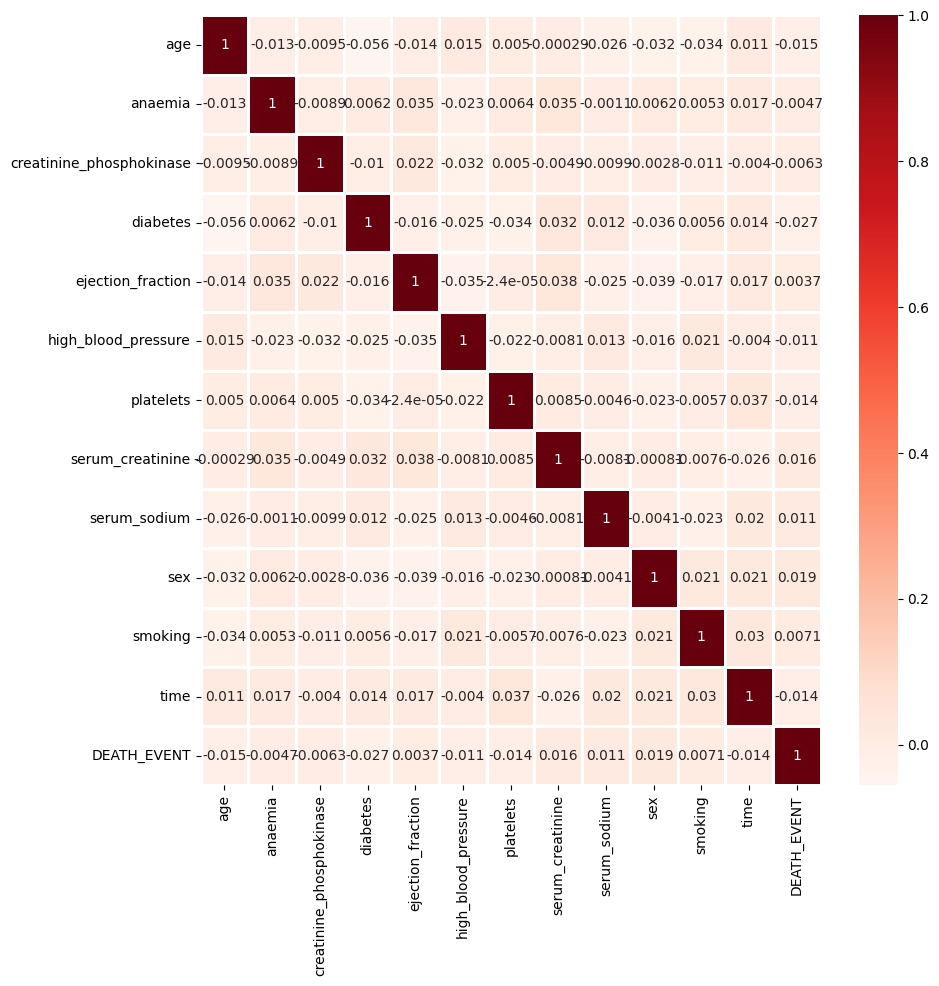

In [361]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Reds",annot=True,linewidth=1)

La matriz muestra que las variables m√°s asociadas con la muerte son serum_creatinine (r ‚âà +0.29) y age (r ‚âà +0.25), mientras que ejection_fraction presenta una correlaci√≥n negativa relevante (r ‚âà ‚àí0.27): es decir, mayor creatinina y edad y menor fracci√≥n de eyecci√≥n se asocian con mayor probabilidad de DEATH_EVENT. Tambi√©n destaca serum_sodium con correlaci√≥n negativa moderada (‚âà ‚àí0.20). Muchas de las variables binarias (anaemia, diabetes, hipertensi√≥n, smoking, sex) tienen correlaciones peque√±as con DEATH_EVENT en t√©rminos de Pearson, aunque visualmente algunas muestran se√±ales; adem√°s sex y smoking est√°n moderadamente correlacionadas entre s√≠ (‚âà +0.45).

### Preprocesamiento y modelado

In [362]:
# 1. Primero veamos los nulos antes de la transformaci√≥n
df.info()
print("Nulos antes de la transformaci√≥n:")
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2531 non-null   Int64  
 1   anaemia                   2667 non-null   boolean
 2   creatinine_phosphokinase  2481 non-null   Int64  
 3   diabetes                  2667 non-null   boolean
 4   ejection_fraction         2571 non-null   float64
 5   high_blood_pressure       2667 non-null   boolean
 6   platelets                 2383 non-null   float64
 7   serum_creatinine          2516 non-null   float64
 8   serum_sodium              2667 non-null   float64
 9   sex                       2667 non-null   boolean
 10  smoking                   2667 non-null   boolean
 11  time                      2667 non-null   int64  
 12  DEATH_EVENT               2667 non-null   boolean
dtypes: Int64(2), boolean(6), float64(4), int64(1)
memory usage: 203.2 KB

age                         136
anaemia                       0
creatinine_phosphokinase    186
diabetes                      0
ejection_fraction            96
high_blood_pressure           0
platelets                   284
serum_creatinine            151
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

# Diagn√≥stico inicial sin estandarizar y sin el pipeline

üìä Resultados - Regresi√≥n Log√≠stica
Accuracy: 0.5222
              precision    recall  f1-score   support

         0.0       0.52      0.77      0.62       196
         1.0       0.52      0.27      0.35       187

    accuracy                           0.52       383
   macro avg       0.52      0.52      0.49       383
weighted avg       0.52      0.52      0.49       383



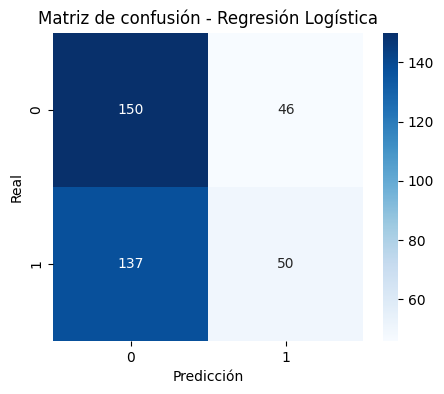


üå≤ Resultados - Random Forest
Accuracy: 0.4439
              precision    recall  f1-score   support

         0.0       0.46      0.54      0.50       196
         1.0       0.42      0.34      0.38       187

    accuracy                           0.44       383
   macro avg       0.44      0.44      0.44       383
weighted avg       0.44      0.44      0.44       383



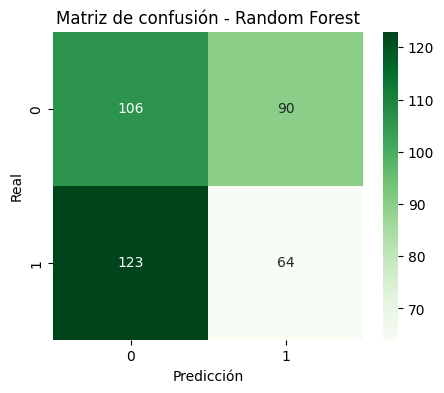

In [363]:
# Se crea una copia del df pero sin valores nulos
df_without_nulls = df.dropna()

# Se crea una copia del df pero sin valores nulos
df_without_nulls = df.dropna()

# Se separa la variable objetivo
X = df_without_nulls.drop('DEATH_EVENT', axis=1)
y = df_without_nulls['DEATH_EVENT']

# Se divide las variables de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Se escalan las variables (Solo para regresion logistica)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# üîπ REGRESI√ìN LOG√çSTICA
# ==========================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("üìä Resultados - Regresi√≥n Log√≠stica")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusi√≥n - Regresi√≥n Log√≠stica")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# ==========================
# üå≤ RANDOM FOREST
# ==========================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nüå≤ Resultados - Random Forest")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusi√≥n - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

In [364]:
# Preparar datos
X = df[[col for col in df.columns if col != 'DEATH_EVENT']]
y = df['DEATH_EVENT']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar shapes antes del entrenamiento
print("\nFormas de los conjuntos de datos:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Formas de los conjuntos de datos:
X_train shape: (2133, 12)
X_test shape: (534, 12)
y_train shape: (2133,)
y_test shape: (534,)


## Pipeline para transformaci√≥n de datos

### Se crean dos pipelines para las columnas num√©ricas con el fin de comparar el efecto que tiene en los modelos, e identificar en cual escenario, los modelos se desempe√±an mejor

In [365]:

# 2. Definir los features y transformadores
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                   'platelets', 'serum_creatinine', 'serum_sodium', 'time']

boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Pipeline para features num√©ricas con verificaci√≥n
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline para features num√©ricas con verificaci√≥n
numeric_transformer_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Pipeline para features booleanas con verificaci√≥n
boolean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(drop='if_binary')) 
])

# Combinar transformadores
preprocessor_median = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ],
    verbose=True 
)


# Combinar transformadores
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_scaler, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ],
    verbose=True 
)

display(preprocessor_median)
display(preprocessor_scaled)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['age', 'creatinine_phosphokinase',
                                  'ejection_fraction', 'platelets',
                                  'serum_creatinine', 'serum_sodium', 'time']),
                                ('bool',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['anaemia', 'diabetes', 'high_blood_pressure',
                                  'sex', 'smoking'])],
                  verbose=True)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'creatinine_phosphokinase',
                                  'ejection_fraction', 'platelets',
                                  'serum_creatinine', 'serum_sodium', 'time']),
                                ('bool',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['anaemia', 'diabetes', 'high_blood_pressure',
                                  'sex', 'smoking'])],
                  verbose=True)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2531 non-null   Int64  
 1   anaemia                   2667 non-null   boolean
 2   creatinine_phosphokinase  2481 non-null   Int64  
 3   diabetes                  2667 non-null   boolean
 4   ejection_fraction         2571 non-null   float64
 5   high_blood_pressure       2667 non-null   boolean
 6   platelets                 2383 non-null   float64
 7   serum_creatinine          2516 non-null   float64
 8   serum_sodium              2667 non-null   float64
 9   sex                       2667 non-null   boolean
 10  smoking                   2667 non-null   boolean
 11  time                      2667 non-null   int64  
 12  DEATH_EVENT               2667 non-null   boolean
dtypes: Int64(2), boolean(6), float64(4), int64(1)
memory usage: 203.2 KB

In [373]:
def resumen_clasificaci√≥n(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    return {"exactitud": acc,
            "precision": prec,
            "recall": recall,
            "f1": f1,
            "roc": roc}

In [375]:

# Definir los modelos a probar

modelos = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

print(modelos)
print("----")
print(type(modelos))


# Crear pipelines completos para cada combinaci√≥n de modelo y preprocesador
pipelines = {} #N√≥tese que es un diccionario

for modelo_nombre, modelo in modelos.items():
    # Pipeline con imputaci√≥n mediana (sin escalado)
    pipelines[f"{modelo_nombre}_median"] = Pipeline([
        ("preprocessing", preprocessor_median),
        ("classifier", modelo)
    ])
    # Pipeline con imputaci√≥n con media + escalado
    pipelines[f"{modelo_nombre}_scale"] = Pipeline([
        ("preprocessing", preprocessor_scaled),
        ("classifier", modelo)
    ])

display(pipelines)

# Entrenar y evaluar cada pipeline
resultados = {}

for nombre_pipeline, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    resultados[nombre_pipeline] = resumen_clasificaci√≥n(y_test, y_pred)


{'RandomForest': RandomForestClassifier(random_state=42), 'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)}
----
<class 'dict'>


{'RandomForest_median': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median'))]),
                                                   ['age',
                                                    'creatinine_phosphokinase',
                                                    'ejection_fraction',
                                                    'platelets',
                                                    'serum_creatinine',
                                                    'serum_sodium', 'time']),
                                                  ('bool',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                         

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


In [376]:
# 1. Convertir el diccionario 'resultados' en un DataFrame
df_resultados = pd.DataFrame(resultados).T

# 2. Ordenar por la columna 'exactitud' de manera descendente
df_resultados_sorted = df_resultados.sort_values(by="exactitud", ascending=False)

# 3. Visualizar el DataFrame resultante
df_resultados_sorted

exactitud  precision  recall        f1       roc
RandomForest_scale          0.483146   0.449612   0.464  0.456693  0.482000
LogisticRegression_median   0.481273   0.438356   0.384  0.409382  0.475451
LogisticRegression_scale    0.479401   0.437500   0.392  0.413502  0.474169
RandomForest_median         0.477528   0.443580   0.456  0.449704  0.476239

In [ ]:
# DataFrame para guardar los resultados de cada fold
df_cv_results = pd.DataFrame(columns=["pipeline", "fold", "accuracy"])

# N√∫mero de folds
cv_folds = 5

pipelines

{'RandomForest_median': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median'))]),
                                                   ['age',
                                                    'creatinine_phosphokinase',
                                                    'ejection_fraction',
                                                    'platelets',
                                                    'serum_creatinine',
                                                    'serum_sodium', 'time']),
                                                  ('bool',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                         

In [378]:
for pipeline_name, pipeline_obj in pipelines.items():
    # cross_val_score entrena y eval√∫a en 5 folds, devolviendo un array con 5 valores de accuracy
    scores = cross_val_score(pipeline_obj, X_train, y_train, cv=cv_folds, scoring="accuracy")

    # Crear un DataFrame temporal con la informaci√≥n de cada fold
    temp_df = pd.DataFrame({
        "pipeline": [pipeline_name]*cv_folds,
        "fold": list(range(1, cv_folds+1)),
        "accuracy": scores
    })

    # Concatenar al DataFrame global
    df_cv_results = pd.concat([df_cv_results, temp_df], ignore_index=True)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\2089431394.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cv_results = pd.concat([df_cv_results, temp_df], ignore_index=True)


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[Colum

c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


In [379]:
# Observa los resultados
df_cv_results.head(20)

pipeline fold  accuracy
0         RandomForest_median    1  0.477752
1         RandomForest_median    2  0.484778
2         RandomForest_median    3  0.461358
3         RandomForest_median    4  0.502347
4         RandomForest_median    5  0.509390
5          RandomForest_scale    1  0.473068
6          RandomForest_scale    2  0.494145
7          RandomForest_scale    3  0.466042
8          RandomForest_scale    4  0.492958
9          RandomForest_scale    5  0.514085
10  LogisticRegression_median    1  0.519906
11  LogisticRegression_median    2  0.536300
12  LogisticRegression_median    3  0.498829
13  LogisticRegression_median    4  0.516432
14  LogisticRegression_median    5  0.478873
15   LogisticRegression_scale    1  0.489461
16   LogisticRegression_scale    2  0.536300
17   LogisticRegression_scale    3  0.494145
18   LogisticRegression_scale    4  0.485915
19   LogisticRegression_scale    5  0.460094

### Despu√©s de la revisi√≥n se encuentra que en general, la regresi√≥n logistica da un resultado similar, pero el modelo con la imputaci√≥n por mediana tiene un resultado un poco mejor

In [ ]:
# Creamos el pipeline que integra el preprocesador (preprocessor_median) y el clasificador
pipeline_rf_median = Pipeline([
    ("preprocessing", preprocessor_median),
    ("classifier", RandomForestClassifier(random_state=42))
])
# Definimos el grid de hiperpar√°metros a explorar
param_grid = {
    "classifier__n_estimators": [50, 100, 200],    # N√∫mero de √°rboles
    "classifier__max_depth": [None, 5, 10],          # Profundidad m√°xima del √°rbol (None para sin l√≠mite)
    "classifier__min_samples_split": [2, 5, 10]      # N√∫mero m√≠nimo de muestras para dividir un nodo
}
# Configuramos GridSearchCV para evaluar con 5 folds y usando la m√©trica "accuracy"
grid_search = GridSearchCV(
    pipeline_rf_median,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1  # Utiliza todos los cores disponibles
)
# Ejecutamos el grid search usando los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostramos los mejores par√°metros y el mejor accuracy obtenido en validaci√≥n cruzada
print("Mejores par√°metros:", grid_search.best_params_)
print("Mejor accuracy (CV):", grid_search.best_score_)

In [389]:
# Creamos el pipeline que integra el preprocesador (preprocessor_median) y el clasificador
pipeline_rf_median = Pipeline([
    ("preprocessing", preprocessor_median),
    ("classifier", LogisticRegression(random_state=42))
])

# Definimos el grid de hiperpar√°metros a explorar
param_grid = {
    "classifier__penalty": ["l2", "none"],  # l1 y elasticnet solo funcionan con solver='saga'
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100],  # Inverso de la regularizaci√≥n
    "classifier__solver": ["lbfgs", "newton-cg", "sag"],  # Algoritmos de optimizaci√≥n
    "classifier__max_iter": [1000, 2500, 5000]  # N√∫mero m√°ximo de iteraciones
}

# Configuramos GridSearchCV
grid_search = GridSearchCV(
    pipeline_rf_median,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,  # Utiliza todos los cores disponibles
    verbose=1
)

# Ejecutamos el grid search
grid_search.fit(X_train, y_train)

# Mostramos los mejores par√°metros y el mejor accuracy
print("Mejores par√°metros:", grid_search.best_params_)
print("Mejor accuracy (CV):", grid_search.best_score_)

# Opcional: mostrar todos los resultados ordenados
resultados_df = pd.DataFrame(grid_search.cv_results_)
resultados_df = resultados_df.sort_values("mean_test_score", ascending=False)
display(resultados_df[["params", "mean_test_score", "std_test_score"]].head())

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\c_cam\Downloads\P

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
Mejores par√°metros: {'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Mejor accuracy (CV): 0.5100680586249738


params  mean_test_score  \
54  {'classifier__C': 1, 'classifier__max_iter': 1...         0.510068   
24  {'classifier__C': 0.01, 'classifier__max_iter'...         0.509603   
30  {'classifier__C': 0.01, 'classifier__max_iter'...         0.509603   
18  {'classifier__C': 0.01, 'classifier__max_iter'...         0.509603   
48  {'classifier__C': 0.1, 'classifier__max_iter':...         0.509600   

    std_test_score  
54        0.019621  
24        0.020472  
30        0.020472  
18        0.020472  
48        0.018934

# Guardar los modelos

In [392]:
import joblib
from pathlib import Path

DATA_DIR = Path.cwd() #/ "Modelos"

# Suponiendo que 'grid_search' es el objeto de GridSearchCV que usamos para el fine-tuning
best_model = grid_search.best_estimator_

# Imprimir el mejor modelo
print("El mejor modelo es:")
print(best_model)

# Guardar el modelo usando joblib con el nombre especificado
joblib.dump(best_model, DATA_DIR / "heart_failure_clinical_records-logistic_regression-v1.joblib")

print("Modelo guardado como 'heart_failure_clinical_records-logistic_regression-v1.joblib'")

El mejor modelo es:
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                         